In [1]:
import pandas as pd
pd.__version__

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
print(sns.__version__)

import plotly
import plotly.express as px
print(plotly.__version__)


0.11.2
5.5.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
churn_orig = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Skillfactory_v2/PYTHON_13/data/churn.csv')
churn_data = churn_orig.copy()


In [ ]:
display(churn_data.head())

In [ ]:
churn_data.drop(columns=['RowNumber'])

###Каково соотношение ушедших и лояльных клиентов?

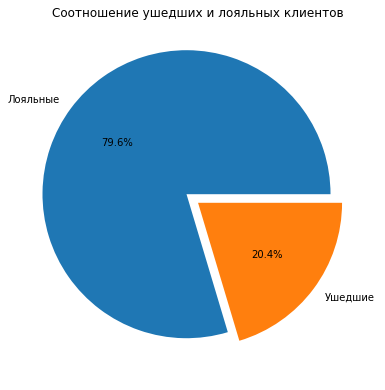

In [ ]:
churnDataExited = churn_data['Exited'].value_counts()
labels = ["Лояльные", "Ушедшие"]

 fig = plt.figure(figsize=(5, 5))
 axes = fig.add_axes([0, 0, 1, 1])
 axes.set_title('Cоотношение ушедших и лояльных клиентов');
 axes.pie(
     churnDataExited,
     labels=labels,
     autopct='%.1f%%',     
     explode = [0.1, 0]    
 );

#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент) - нулей больше = > больше лоаяльных клиентов

**Итог**
<br >
Лояльных клиентов больше ушедших в 4 раза.

###Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

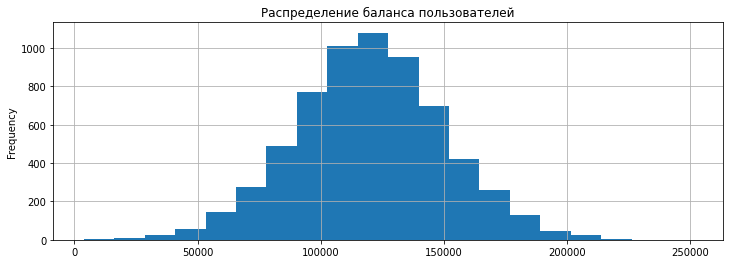

In [ ]:
churndataMore2500 = churn_data[churn_data['Balance']>2500]
churndataMore2500['Balance'].plot(
    kind='hist',
    figsize=(12, 4),
    title='Распределение баланса пользователей',
    grid = True,
    bins=20,
    lw=3
);


**Итог**
<br >
В выборке клиентов, у которых баланс больше 2500, больше всего пользователей с балансом в районе 12000-13000. Распределение баланса идет согласно нормальному закону распределения.

###Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?

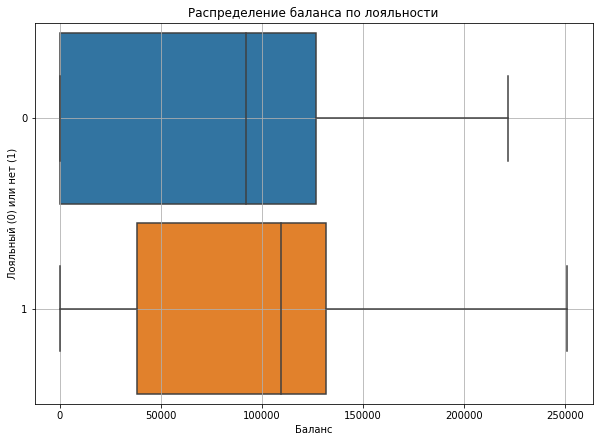

In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited', 
    x='Balance',
    orient='h',
    width=0.9
)

boxplot.set_title('Распределение баланса по лояльности');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльный (0) или нет (1)');
boxplot.grid()

**Итог**
<br >
У многих лояльных клиентов нет денег на балансе. Но как только они появляются, клиенту что-то перестает нравится в услугах банка и некоторые из них хотят уйти

###Посмотрите на распределение возраста в разрезе признака оттока.

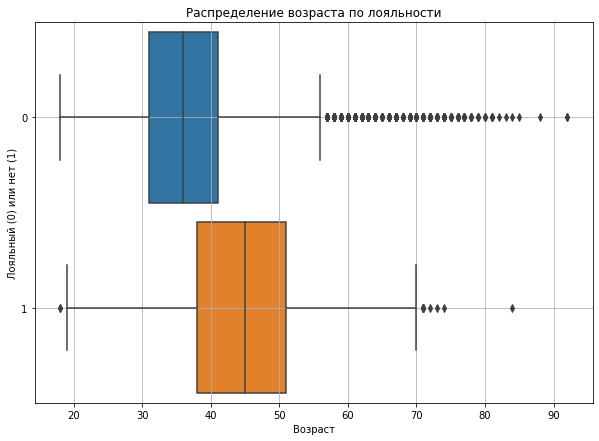

In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited', 
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста по лояльности');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльный (0) или нет (1)');
boxplot.grid()

**Итог**
<br >
Больше всего уходят людей в более в возрасте от 40 до 50 лет. <br >
Более молодые остаются, видимо у них не так много денег на счете. <br >
Однако среди лояльных есть выбросы людей старшего возраста, которые видимо привыкли к банку и менять его не хотят, но такие люди в пределах погрешности

###Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

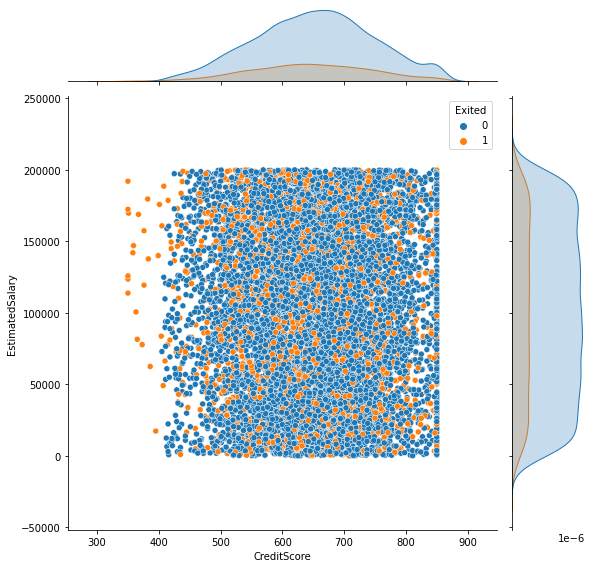

In [ ]:
jointplot = sns.jointplot(
    data=churn_data,
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',    
    height=8,
)


**Итог**
<br >
Наблюдаемой зависимости между кредитным рейтингом клиента и его предполагаемой зарплаты не обнаружено. 
Можно отметить, что среди ушедших большинство клиентов с низким кредитным рейтингом




###Кто чаще уходит, мужчины или женщины?

Female    1139
Male       898
Name: Gender, dtype: int64

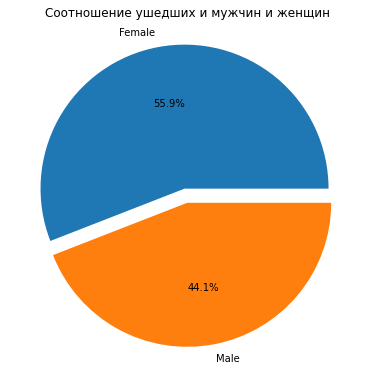

In [ ]:
exitedGender= churn_data[churn_data['Exited']==1]['Gender'].value_counts()
display(exitedGender)

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Cоотношение ушедших и мужчин и женщин');
axes.pie(
     exitedGender,
     labels=exitedGender.index,
     autopct='%.1f%%',
     explode = [0.1, 0]    
 );



**Итог**
<br >
Среди ушедших клиентов больше наблюдается женщин

###Как отток клиентов зависит от числа приобретённых у банка услуг

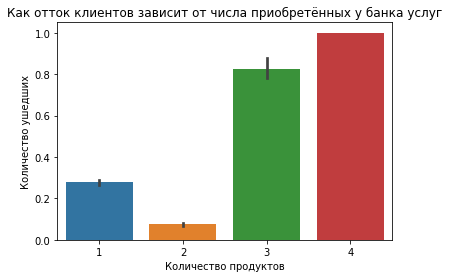

In [ ]:
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
    #hue='numOfProducts',
)
barplot.set_title('Как отток клиентов зависит от числа приобретённых у банка услуг');
barplot.set_xlabel('Количество продуктов');
barplot.set_ylabel('Количество ушедших');

**Итог**
<br >
Очень интересная статистика. Кто берет 4 продукта обязателно уходит! Среди тех, кто берет 3 продукта уходят 80 процентов. У кого 2 продукта остается. 

###Как влияет наличие статуса активного клиента на отток клиентов

In [ ]:
display(churn_data[churn_data['NumOfProducts']==4])

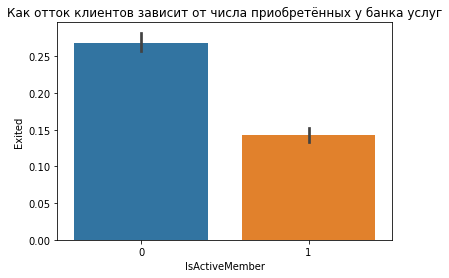

In [ ]:
barplot = sns.barplot(
    data=churn_data,
    x='IsActiveMember',
    y='Exited',
    #hue='numOfProducts',
)
barplot.set_title('Как влияет наличие статуса активного клиента на отток клиентов');
 #есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

**Итог**
<br >
Активные клиенты уходят в 2 раза реже. Необходимо работать с клиентами - давать им активный статус. Видимо это дает какие-то приемущества, если клиенты не уходят. 

###В какой стране доля ушедших клиентов больше?

In [4]:
exitedPers  =  churn_data.groupby(
    ['Geography'], 
    as_index=False
)['Exited'].agg(['mean'])
display(exitedPers)
fig = px.choropleth(
    data_frame=exitedPers,
    locations=exitedPers.index, 
    locationmode = "country names",
    color="mean", 
    range_color=[0, 1], 
    title='Global Spread of COVID-19', 
    width=800, 
    height=500,
    color_continuous_scale='Reds' 
)

#отображаем график
fig.show()

,mean
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


**Итог**
<br >
Из Германии клиенты уходят в 2 раза больше чем из Испании и Франции. Может это свзяно с работой местных отделений. Вообщем необходима работа на местах.

###Тепловая карта с аннотацией

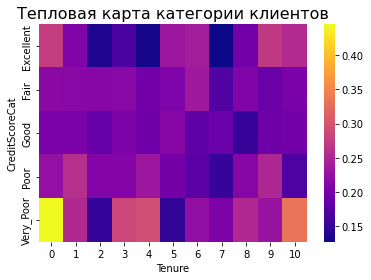

In [5]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
     aggfunc='mean',
)


heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта категории клиентов', fontsize=16);

**Итог**
<br >
Больше всего уходят клиенты, у которых низкий рейтинг и которые клиенты меньше года. И вообще уходят те, у которых рейтинг ниже, тк видимо им не дают выгодные предолжения. <br >
Также можно отметить уход клиентов с высоким рейтингом. Скорее всего им делают более выгодные предложения другие банки. Следует обратить внимание на таких клиентов и работать с ними активнее. 
